# Tests for Scalar_masks_X

In [4]:
from diffractio import np, plt, um, degrees
from diffractio.scalar_masks_X import Scalar_mask_X

## test_slit

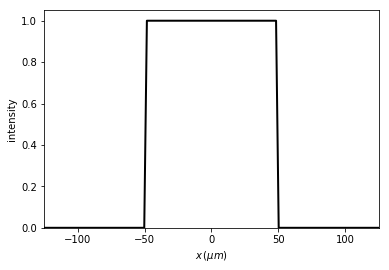

In [6]:
num_data = 128
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
wavelength = 1 * um

t = Scalar_mask_X(x, wavelength)
t.slit(x0=0, size=100 * um)
t.draw()

## Insert mask 

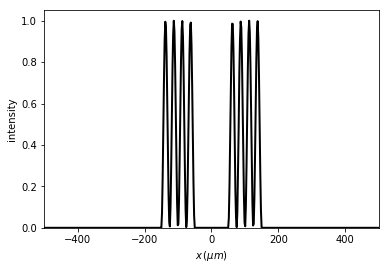

In [3]:
x1 = np.linspace(-500 * um, 500 * um, 512)
wavelength = .5 * um

t1 = Scalar_field_X(x1, wavelength)
t1.clear_field()

x2 = np.linspace(-50 * um, 50 * um, 512)
wavelength = .5 * um
t2 = Scalar_field_X(x2, wavelength)
t2.u = np.sin(2*np.pi*x2/50)

t1.insert_mask(t2, x0_mask1=-100*um, clean=False, kind_position='center')
t1.insert_mask(t2, x0_mask1=100*um, clean=False, kind_position='center')
t1.draw()

## Insert array mask

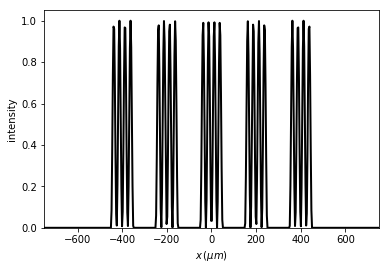

In [4]:
x1 = np.linspace(-750 * um, 750 * um, 512)
wavelength = .5 * um

t1 = Scalar_field_X(x1, wavelength)
t1.clear_field()

x2 = np.linspace(-50 * um, 50 * um, 512)
wavelength = .5 * um
t2 = Scalar_field_X(x2, wavelength)
t2.u = np.sin(2*np.pi*x2/50)


t1.insert_array_masks(t2, x_pos=[-400, -200, 0, 200, 400 ], clean=True, kind_position='center')
t1.draw()


## Cut resample

In [5]:
x = np.linspace(-500 * um, 500 * um, 512)
wavelength = .5 * um

t1 = Scalar_field_X(x, wavelength)
t1.u = np.sin(2 * np.pi * x / 100)

t2 = t1.cut_resample(
    x_limits=(-50*um, 50*um), num_points=1024, new_field=True, interp_kind='quadratic')

print(len(t1.u), len(t2.u))

512 1024


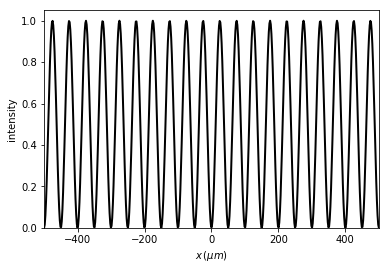

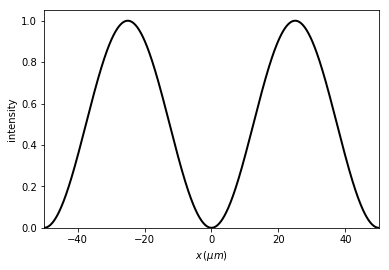

In [6]:
t1.draw()
t2.draw()

## get_edges

[-450.18315018 -349.81684982 -249.81684982 -150.18315018  -49.81684982
   49.81684982  150.18315018  250.18315018  350.18315018  449.81684982]
[ 1. -1.  1. -1.  1. -1.  1. -1.  1. -1.]


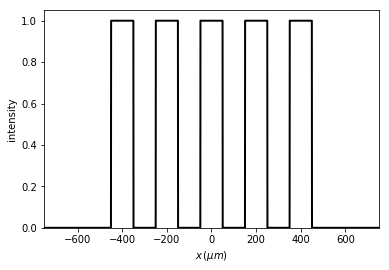

In [7]:
x1 = np.linspace(-750 * um, 750 * um, 4096)

x2 = np.linspace(-50 * um, 50 * um, 4096)
wavelength = .5 * um

t2 = Scalar_field_X(x2, wavelength)
t2.u = np.ones_like(x2, dtype=complex)

t1 = Scalar_field_X(x1, wavelength)
t1.insert_array_masks(
    t2,
    x_pos=[-400, -200, 0, 200, 400],
    clean=True,
    kind_position='center')

pos_transitions, type_transitions, raising, falling = t1.get_edges(
    kind_transition='amplitude', min_step=.05)
print(pos_transitions)
print(type_transitions)
t1.draw(kind='intensity', logarithm=False, normalize=False, filename='')


## Test fft

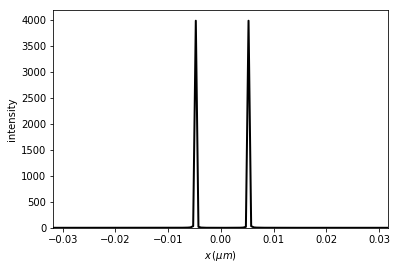

In [8]:
x = np.linspace(-500 * um, 500 * um, 128)
wavelength = .5 * um

t1 = Scalar_field_X(x, wavelength)
t1.u = np.sin(2 * np.pi * x / 100)

t2=t1.fft(z=None, shift=True, remove0=False, matrix=False, new_field=True, verbose=False)
t2.draw()

## RS

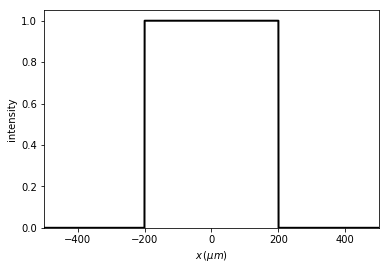

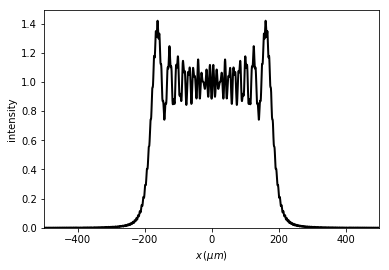

In [9]:
num_data = 4096

x = np.linspace(-500*um, 500*um, num_data)
wavelength = 1 * um

t1 = Scalar_field_X(x, wavelength, info="test_RS t1")
t1.u[np.bitwise_and(x>-200*um, x<200*um)]=1
t1.draw()

u1 = t1.RS(z=2000 * um, new_field=True)
u1.draw(kind='intensity')


## RS_amplifciation

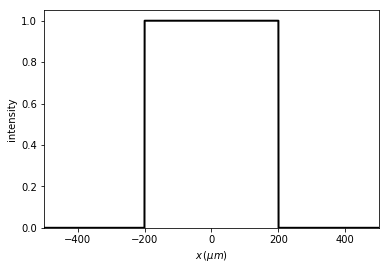

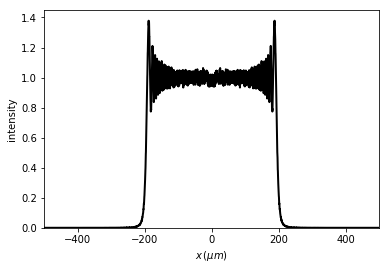

In [16]:
num_data = 4096

x = np.linspace(-500 * um, 500 * um, num_data)
wavelength = 1 * um

xout = np.linspace(-1000 * um, 0 * um, num_data)

t1 = Scalar_field_X(x, wavelength, info="test_RS t1")
t1.u[np.bitwise_and(x > -200 * um, x < 200 * um)] = 1
t1.draw()

t2=t1.RS_resample(
    zs=(10 * um, 200*um),
    n=1,
    percentage=0.9,
    factor_amplification=3,
    new_field=True,
    verbose=False,
    has_draw=False)
t2.draw(kind='intensity')

## Draw

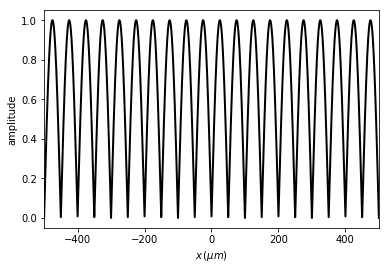

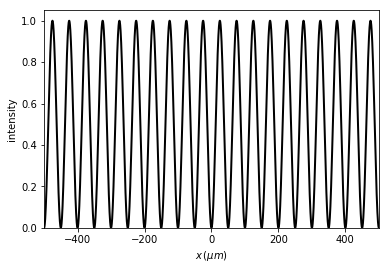

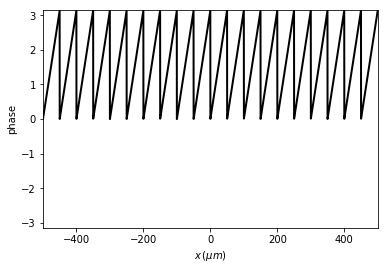

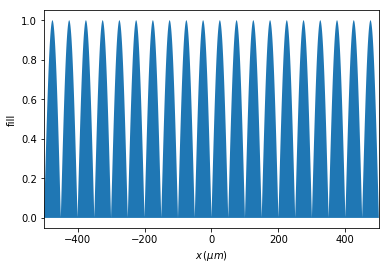

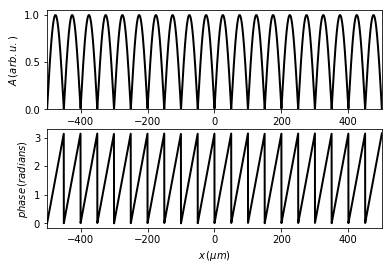

In [11]:
x = np.linspace(-500 * um, 500 * um, 4096)
wavelength = .5 * um

t1 = Scalar_field_X(x, wavelength)
t1.u=np.sin(2*np.pi*x/100)*np.exp(1j*2*np.pi*x/100)

t1.draw(kind='amplitude')
t1.draw(kind='intensity')
t1.draw(kind='phase')
t1.draw(kind='fill')
t1.draw(kind='field')

## e

intensidad total=0.7991654633453246 W/m


Text(0.5, 1.0, 'rendija')

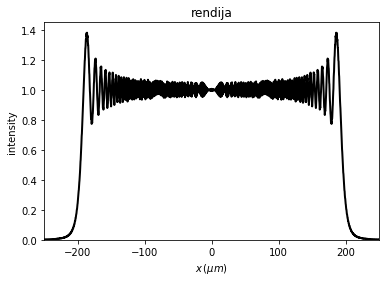

In [12]:

num_data = 1024*8

x = np.linspace(-250*um, 250*um, num_data)
wavelength = 0.6328 * um
z = 400 * um

area = num_data

# intensidad de una onda plana
u0 = Scalar_field_X(x, wavelength)
u0.u[np.bitwise_and(x>-200*um, x<200*um)]=1

# intensidad de la propagacion
u0.RS(z=z, n=1, new_field=False, verbose=False)
print("intensidad total={} W/m".format(u0.average_intensity()))
u0.draw(
    kind='intensity', logarithm=False, normalize=False, filename='')
plt.title('onda plana difractada muy poco')

plt.title('rendija')

# intensidad de la prop
